idx 2 numpy script
==========

Einlesen:
<https://gist.github.com/tylerneylon/ce60e8a06e7506ac45788443f7269e40>

Ausgeben:
<https://python-programmieren.com/deep-learning-mnist-database/>


In [ ]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow

Text(0.5,1,'Number: 9')

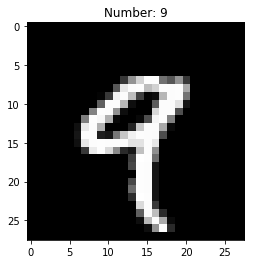

In [14]:
import gzip
import struct
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

bilder_idx = "train-images-idx3-ubyte.gz"
bezeichnungen_idx = "train-labels-idx1-ubyte.gz"
bild_nr = 4

with gzip.open(bilder_idx) as f:
    zero, data_type, dims = struct.unpack('>HBB', f.read(4))
    shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
    bilder = np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

with gzip.open(bezeichnungen_idx) as f:
    zero, data_type, dims = struct.unpack('>HBB', f.read(4))
    shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
    bezeichnungen_int = np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
    # Bezeichnungen in one-hot Format umwandeln
    bezeichnungen = tf.one_hot(bezeichnungen_int, 10)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(bilder[bild_nr], cmap='gray')
ax.set_title("".join(["Number: ", str(bezeichnungen_int[bild_nr])]))

Training
=======
Listing aus iX Artikel

In [ ]:
with tf.name_scope('model'):
    x = tf.placeholder(tf.float32, [None, 784])
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))
    y = tf.nn.softmax(tf.matmul(x, W) + b)
    
with tf.name_scope('train'):
    y_ = tf.placeholder(tf.float32, [None, 10])
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    
with tf.Session() as session:
    init = tf.global_variables_initializer()
    session.run(init)
    for i in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        session.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    #Test
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(session.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))